In [121]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
import spacy
import string
import re 
%matplotlib inline

In [122]:
import os
path = os.getcwd()
print(path)
df_train = pd.read_csv(path+'\dataset\Train.csv')
df_test = pd.read_csv(path+'\dataset\Test.csv')

c:\Users\91895\Desktop\NLP


In [123]:
df = [df_train, df_test]

In [124]:
train_df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [125]:
train_df.shape

(40000, 2)

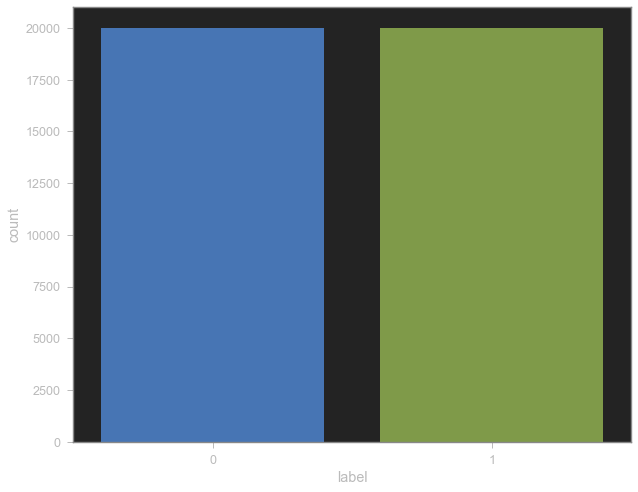

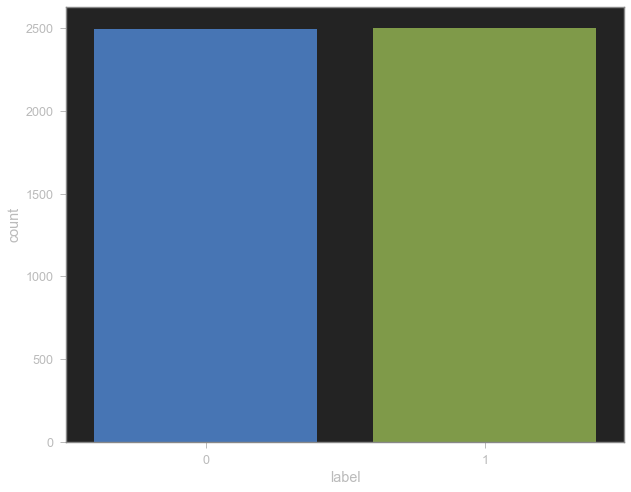

In [126]:
import seaborn as sns
for data in df:
    plt.figure(figsize=(10,8))
    sns.countplot(x = data['label'], data = data)
    plt.show()

Provided data is balanced data

Text data preprocessing

In [127]:
#converting to lower case
for data in df:
    data['text'] = data['text'].str.lower()

In [128]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [129]:
for data in df:
    data['text'] = data['text'].apply(remove_urls)

In [130]:
def remove_emoji(text):
    text = re.sub('<[^>]*.', '', text)
    emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
    return text


In [131]:
for data in df:
    data['text'] = data['text'].apply(remove_emoji)

In [132]:
df_train.head()

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [133]:
#removing punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

for data in df:
    data['text'] = data['text'].apply(remove_punctuation)

In [134]:
data['text'][100]

'maybe it s unfair to dislike a movie for what it isn t rather than what it is but i approached this hoping that finally a filmmaker would make a movie about small town rural gay men and women instead the focus is primarily on the outrageous bigotry big news of the locals and those in outlying areas and the really gruesome torture murder of a young gay man so much time devoted to stupid people squawking about aids sin hellfire and perverts so much time devoted to the ghoulish preacher ranting about the bible and gay people getting what they deserve i wanted to see more of the people that came to the small town gay bar not those who opposed it in addition the young man who was murdered isn t even from this town the whole movie works as a warning rather than a celebration and it s very suspect '

In [135]:
from nltk.tokenize import word_tokenize


In [136]:
df_train['text'][1]

'when i put this movie in my dvd player and sat down with a coke and some chips i had some expectations i was hoping that this movie would contain some of the strong points of the first movie awsome animation good flowing story excellent voice cast funny comedy and a kick ass soundtrack but to my disappointment not any of this is to be found in atlantis milo s return had i read some reviews first i might not have been so let down the following paragraph will be directed to those who have seen the first movie and who enjoyed it primarily for the points mentioned when the first scene appears your in for a shock if you just picked atlantis milo s return from the display case at your local videoshop or whatever and had the expectations i had the music feels as a bad imitation of the first movie and the voice cast has been replaced by a not so fitting one with the exception of a few characters like the voice of sweet the actual drawings isnt that bad but the animation in particular is a sad

In [147]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# for data in df:
#     data['text'] = [word for word in data['text'].str.split() if word not in stopwords.words('english')]

In [138]:
# def tokenize_word(text):
#     return text.split()

# for data in df:
#     data['text'] = data['text'].apply(tokenize_word)



In [139]:
# from nltk.stem.porter import PorterStemmer
# stemmer = PorterStemmer()
# def stem_words(text):
#     return " ".join([stemmer.stem(word) for word in text])

# for data in df:
#     data["text"] = data["text"].apply(lambda text: stem_words(text))

In [140]:
from wordcloud import wordcloud


In [141]:
from wordcloud import WordCloud
positivedata = df_train[ df_train['label'] == 1]
positivedata =positivedata['text']
negdata = df_train[df_train['label'] == 0]
negdata= negdata['text']

In [149]:
def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop_words,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words are as follows


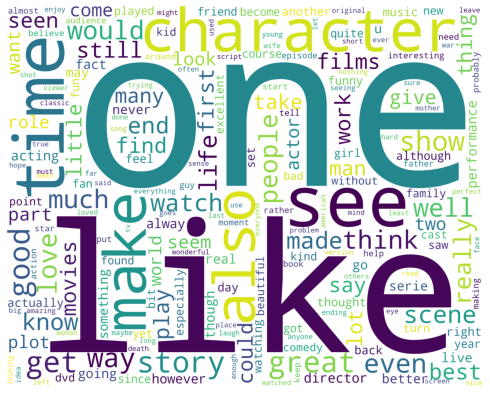

Negative words are as follows


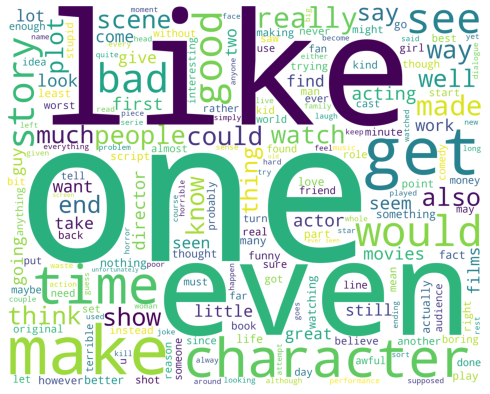

In [150]:
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)